In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [116]:
train = pd.read_csv('train.csv')

In [117]:
holidays = pd.read_csv('holidays_events.csv')

In [118]:
store_nbr = 1
df = train[train['store_nbr'] == store_nbr].copy()

In [119]:
df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [120]:
df.shape

(55572, 6)

In [121]:
df['date'] = pd.to_datetime(df['date'])
holidays['date'] = pd.to_datetime(holidays['date'])

In [122]:
holidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [123]:
holidays['type'].value_counts()

type
Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: count, dtype: int64

In [124]:
holidays = holidays[holidays['type'] != 'Work Day']

In [125]:
holidays['is_holiday'] = holidays['type'].isin(['Holiday', 'Event','Additional','Transfer']).astype(int)

In [126]:
holidays = holidays[['date','type','is_holiday']]

In [127]:
holidays.head()

,date,type,is_holiday
0,2012-03-02,Holiday,1
1,2012-04-01,Holiday,1
2,2012-04-12,Holiday,1
3,2012-04-14,Holiday,1
4,2012-04-21,Holiday,1


In [128]:
#merging data
df = df.merge(holidays, on='date', how='left')
df.head()

,id,date,store_nbr,family,sales,onpromotion,type,is_holiday
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,1.0
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,1.0
2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,1.0
3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,1.0
4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,1.0


In [129]:
df.head()

,id,date,store_nbr,family,sales,onpromotion,type,is_holiday
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,1.0
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,1.0
2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,1.0
3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,1.0
4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,1.0


In [130]:
df['month'] = df['date'].dt.to_period('M')

In [131]:
monthly = df.groupby('month').agg({
    'sales': 'sum',
    'onpromotion': 'sum',
    'is_holiday': 'sum'
}).reset_index()

In [132]:
monthly['month'] = monthly['month'].dt.to_timestamp()

In [133]:
# monthly groupby data
monthly.head()

,month,sales,onpromotion,is_holiday
0,2013-01-01,156864.199004,0,33.0
1,2013-02-01,129814.332014,0,66.0
2,2013-03-01,151666.227994,0,33.0
3,2013-04-01,155848.493959,0,165.0
4,2013-05-01,156870.205004,0,165.0


In [134]:
t = pd.read_csv('transactions.csv')

In [135]:
store_nbr = 1
tr = t[t['store_nbr'] == store_nbr].copy()

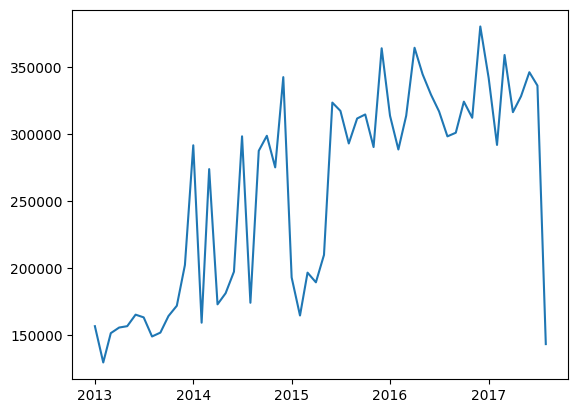

In [136]:
plt.plot(monthly['month'], monthly['sales'])

In [137]:
# from statsmodels.tsa.seasonal import seasonal_decompose

# monthly_ts = monthly.set_index('month')['sales']

# result = seasonal_decompose(monthly_ts, model='additive')
# result.plot()
# plt.show()


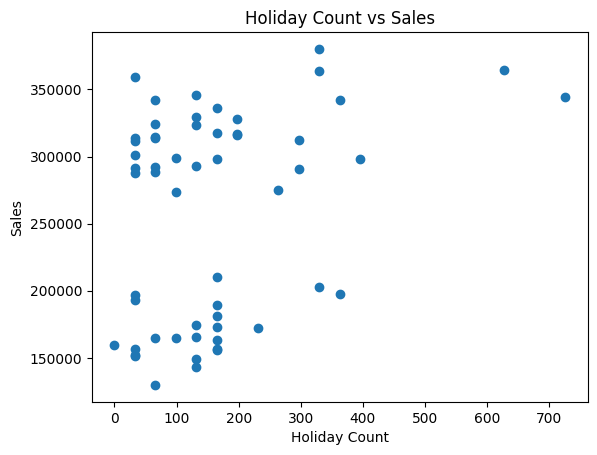

In [138]:
plt.scatter(monthly['is_holiday'], monthly['sales'])
plt.title("Holiday Count vs Sales")
plt.xlabel("Holiday Count")
plt.ylabel("Sales")
plt.show()


In [139]:
monthly.groupby("is_holiday")["sales"].mean()


is_holiday
0.0      159458.498923
33.0     246823.229699
66.0     271175.220904
99.0     245690.317816
132.0    240554.633414
165.0    218193.097567
198.0    320462.090912
231.0    172089.612018
264.0    275190.996999
297.0    301267.388466
330.0    315526.896016
363.0    269971.520198
396.0    298349.560015
627.0    364339.344039
726.0    344540.015203
Name: sales, dtype: float64

In [140]:
monthly.corr()


,month,sales,onpromotion,is_holiday
month,1.000000,0.745509,0.883277,0.138374
sales,0.745509,1.000000,0.774203,0.301792
onpromotion,0.883277,0.774203,1.000000,0.205588
is_holiday,0.138374,0.301792,0.205588,1.000000


<Axes: >

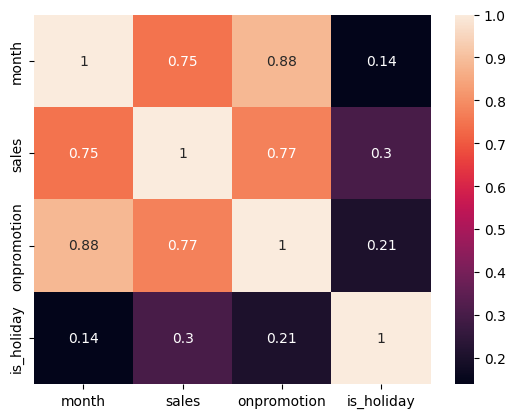

In [141]:
import seaborn as sns
sns.heatmap(monthly.corr(), annot=True)

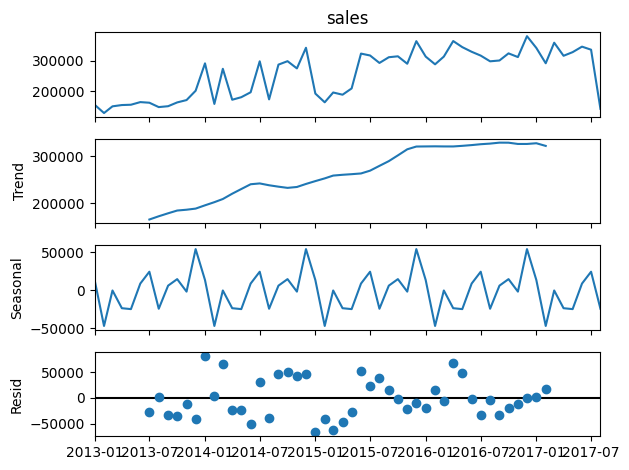

In [142]:
from statsmodels.tsa.seasonal import seasonal_decompose

monthly_ts = monthly.set_index('month')['sales']

result = seasonal_decompose(monthly_ts, model='additive')
result.plot()
plt.show()


In [143]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(monthly_ts)
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])


ADF Statistic: -1.685252207261154
p-value: 0.4387265529671104


### Feature Engg


In [144]:
monthly['month_num'] = monthly['month'].dt.month
monthly['year'] = monthly['month'].dt.year


In [145]:
monthly['lag_1'] = monthly['sales'].shift(1)
monthly['lag_12'] = monthly['sales'].shift(12)

In [146]:
monthly.head()

,month,sales,onpromotion,is_holiday,month_num,year,lag_1,lag_12
0,2013-01-01,156864.199004,0,33.0,1,2013,NaN,NaN
1,2013-02-01,129814.332014,0,66.0,2,2013,156864.199004,NaN
2,2013-03-01,151666.227994,0,33.0,3,2013,129814.332014,NaN
3,2013-04-01,155848.493959,0,165.0,4,2013,151666.227994,NaN
4,2013-05-01,156870.205004,0,165.0,5,2013,155848.493959,NaN


In [152]:
monthly.to_csv('monthly.csv',index=False)

In [151]:
monthly.head()

,month,sales,onpromotion,is_holiday,month_num,year,lag_1,lag_12,rolling_3,rolling_6
0,2014-01-01,291664.751474,0,33.0,1,2014,202431.688007,156864.199004,222062.017166,188643.427590
1,2014-02-01,159458.498923,0,0.0,2,2014,291664.751474,129814.332014,217851.646135,190355.958585
2,2014-03-01,273914.544883,0,99.0,3,2014,159458.498923,151666.227994,241679.265093,210662.469395
3,2014-04-01,173138.393132,0,165.0,4,2014,273914.544883,155848.493959,202170.478979,212116.248073
4,2014-05-01,181408.251539,0,165.0,5,2014,173138.393132,156870.205004,209487.063185,213669.354660


In [149]:
monthly['rolling_3'] = monthly['sales'].rolling(3).mean()
monthly['rolling_6'] = monthly['sales'].rolling(6).mean()


In [150]:
monthly = monthly.dropna().reset_index(drop=True)